   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Precisión del modelo: 100.00%


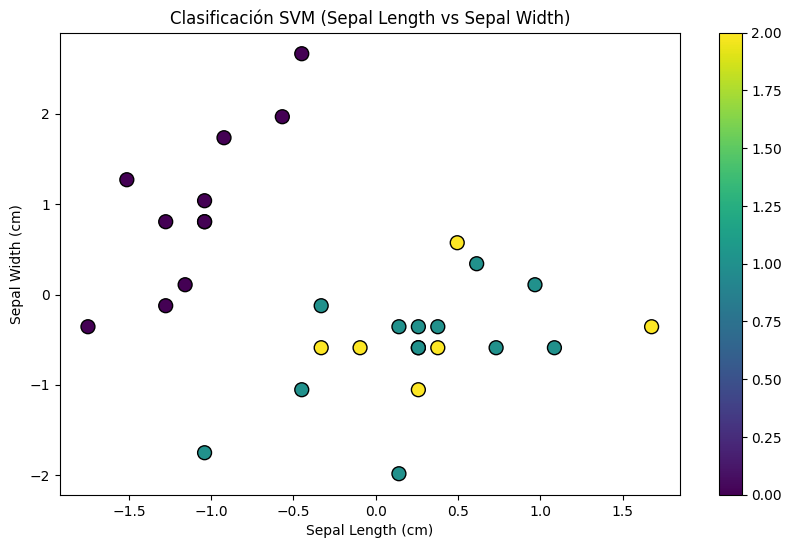

In [1]:
## Importar bibliotecas
import numpy as np  # Para operaciones matemáticas
import matplotlib.pyplot as plt  # Para visualización de datos
import pandas as pd  # Para manipulación de datos
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento/prueba
from sklearn.preprocessing import StandardScaler  # Para escalado de características
from sklearn.svm import SVC  # Para el clasificador SVM
from sklearn.preprocessing import LabelEncoder  # Para codificar las etiquetas

# Cargar el conjunto de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columnas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = pd.read_csv(url, header=None, names=columnas)

# Ver las primeras filas para entender el conjunto de datos
print(dataset.head())

# Dividir las características (X) y las etiquetas (y)
X = dataset.iloc[:, :-1].values  # Características
y = dataset.iloc[:, -1].values   # Etiquetas (especies de flores)

# Codificar las etiquetas de las especies a valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado de características
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Crear y entrenar el modelo SVM
modelo_svm = SVC(kernel='linear', random_state=0)
modelo_svm.fit(X_train, y_train)

# Predecir el resultado para el conjunto de prueba
y_pred = modelo_svm.predict(X_test)

# Mostrar la precisión del modelo
from sklearn.metrics import accuracy_score
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision * 100:.2f}%')

# Visualización de los resultados (solo para 2 características para fines de visualización)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title("Clasificación SVM (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.colorbar() 
plt.show()
